# Statistics
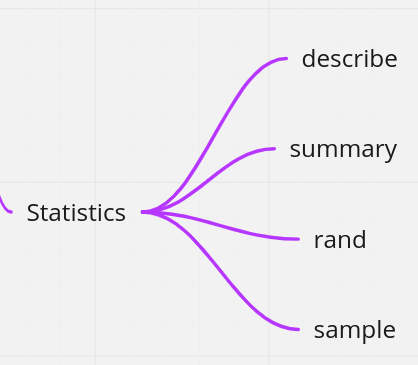

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

# Define the schema for a DataFrame
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("city", StringType(), True)
])


# Create a DataFrame using the schema
data = [("Alice", 25, "New York")
        , ("Bob", 30, "San Francisco")
        , ("Bob", None, "Las Vegas")
        , ("Charlie", 35, "Chicago")
        , ("Charlie", 35, None)]
df = spark.createDataFrame(data, schema)

# Show the DataFrame
df.show()

### [describe](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.describe.html#pyspark.sql.DataFrame.describe)

describe(*cols: Union[str, List[str]]) → pyspark.sql.dataframe.DataFrame

Computes basic statistics for numeric and string columns.

This include count, mean, stddev, min, and max. If no columns are given, this function computes statistics for all numerical or string columns.

In [ ]:
df.describe()

In [ ]:
df.describe().show()

In [ ]:
df.describe(['age']).show()

## [summary](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.summary.html)

DataFrame.summary(*statistics: str) → pyspark.sql.dataframe.DataFrame

Computes specified statistics for numeric and string columns. Available statistics are: - count - mean - stddev - min - max - arbitrary approximate percentiles specified as a percentage (e.g., 75%)

If no statistics are given, this function computes count, mean, stddev, min, approximate quartiles (percentiles at 25%, 50%, and 75%), and max.

In [ ]:
df.summary()

In [ ]:
df.summary().show()

In [ ]:
df.summary('mean').show()

## [rand](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.rand.html)

pyspark.sql.functions.rand(seed: Optional[int] = None) → pyspark.sql.column.Column

Generates a random column with independent and identically distributed (i.i.d.) samples uniformly distributed in [0.0, 1.0).

In [ ]:
df_rand = df.withColumn('rand', F.rand())
df_rand.toPandas()

In [ ]:
df_rand = df.withColumn('rand', F.rand(123))
df_rand.toPandas()

# [sample](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.sample.html)

DataFrame.sample(withReplacement=None, fraction=None, seed=None)

Returns a sampled subset of this DataFrame.

Parameters:

withReplacement: bool, optional

Sample with replacement or not (default False).

fraction: float, optional

Fraction of rows to generate, range [0.0, 1.0].

seed: int, optional

Seed for sampling (default a random seed).

In [ ]:
df = spark.range(10)

df.sample(False, 0.5).show()

In [ ]:
df = spark.range(10)

df.sample(True, 0.5).show()

In [ ]:
df_sample = df.sample(False, 0.1, 123)
df_sample.toPandas()